# Plot Module

The plot module has a wide variety of tools to plot different sets of data. All the tools have been done with the idea of modularity and work well mixed with usual matplotlib sintax as they allow to aim for a certain subplot when plotted. This way one can tweak the defaults either with the provided variables or manually within matplotlib.  

**<font color='red'>So far the code supports:</font>**
- **Plotting band structures** of Quantum Espresso, VASP, Wannier90 and Wanniertools.
- **Comparing band structures** of different ab initio codes.
---
>*The **documentation** of every function is accesible with the usual **shift + tab** shortcut.*
---

In [1]:
from yaiv import plot

## Bands

### Minimal plotting

One can plot the band structure just from the raw output file from a variety of codes *(Quantum Espresso, VASP, Wannier90, Wanniertools...)*.  
Combined with the ability of zomming in (use of **ipympl**) is easy to explore new data.

#### QE

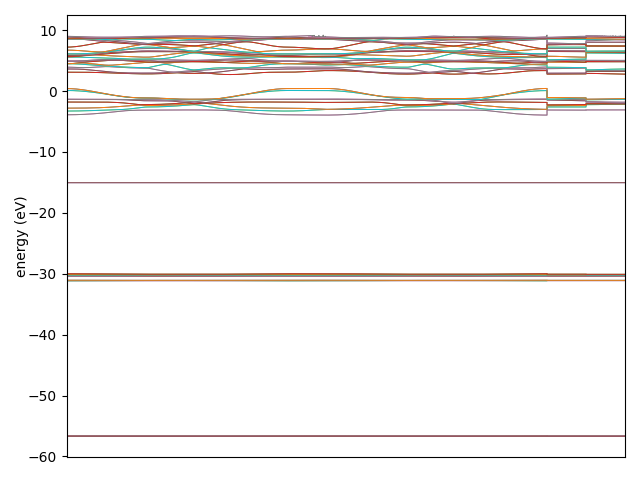

In [2]:
plot.bands(file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo')

#### VASP

CAUTIION: There was no cell introduced, threfore distances are wrong


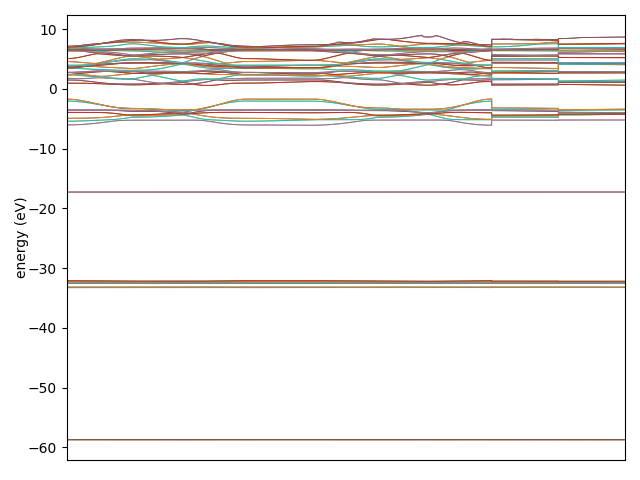

In [3]:
plot.bands(file='DATA/bands/VASP/EIGENVAL_BS',filetype='vasp')

#### Wannier

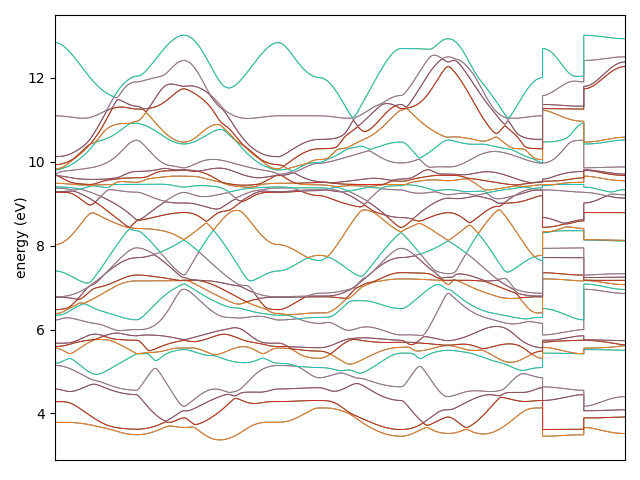

In [4]:
plot.bands(file='DATA/bands/Wannier90/CsV3Sb5_band.dat',filetype='gnu')

### Non-minimal

- By introducing a few more files in the input, we can get a publication ready plot superfast!. Use the **save_as='name.png'** variable to directly save the plot in high resolution.
- Nice plots can be obtained with very **minimal input**, however, almost any important parameter can be overwritten.
- Any **KPATH file** containing an optimal path for the specific space group can be obtained in the [TQC website](https://www.topologicalquantumchemistry.fr/#/). (Enter in any compound and click in the Download KPATH link).
    - You can still use your own paths, look at the **ticks** and **labels** variables.


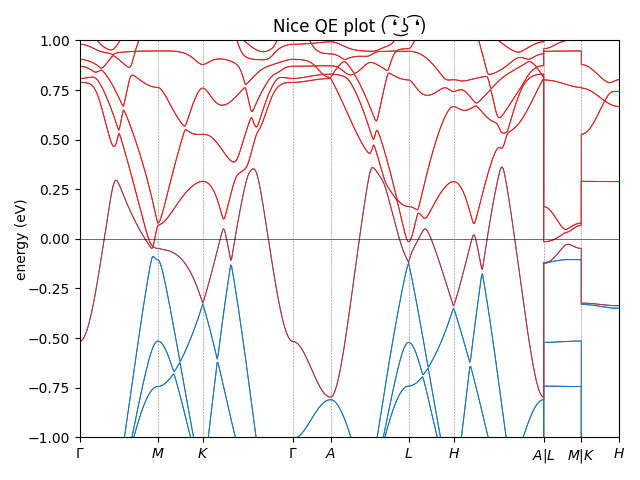

In [5]:
plot.bands(file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',    #raw data file with the band structure
                KPATH='DATA/bands/KPATH',                           #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo', #File needed to read the number of electrons and lattice parameters
                title='Nice QE plot ( ͡❛ ͜ʖ ͡❛)')                      # A title of your liking

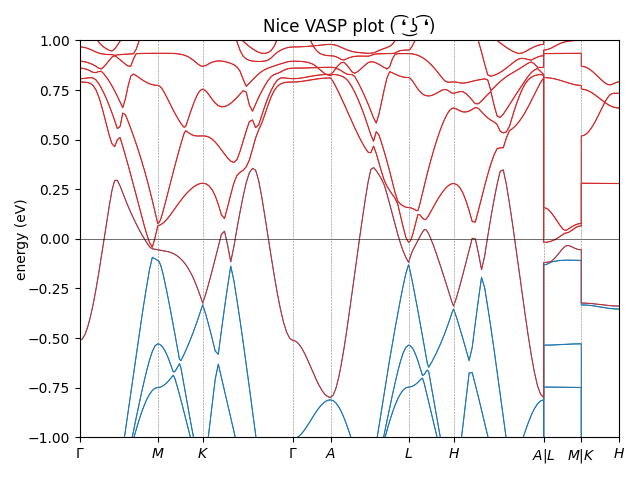

In [6]:
plot.bands(file='DATA/bands/VASP/EIGENVAL_BS',    #raw data file with the band structure
                KPATH='DATA/bands/KPATH',         #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/VASP/OUTCAR_SCC',#File needed to read the number of electrons and lattice parameters
                title='Nice VASP plot ( ͡❛ ͜ʖ ͡❛)',# A title of your liking
                filetype='vasp')                  #filetype (Quantum espresso being the default)

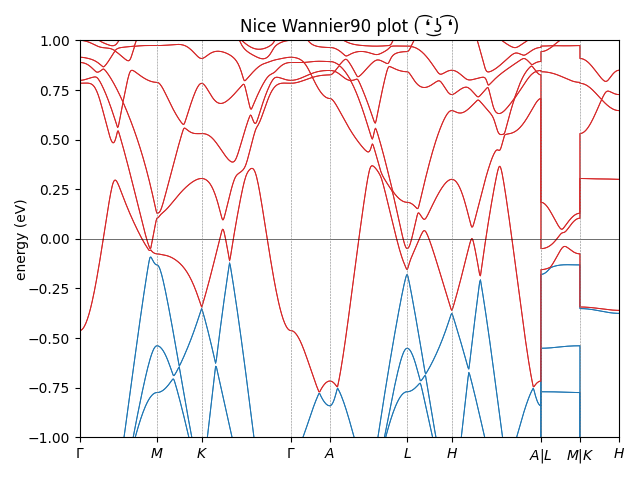

In [7]:
plot.bands(file='DATA/bands/Wannier90/CsV3Sb5_band.dat',#raw data file with the band structure
                KPATH='DATA/bands/KPATH',                #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo',#File needed to read the number of electrons and lattice parameters
                title='Nice Wannier90 plot ( ͡❛ ͜ʖ ͡❛)',   # A title of your liking
                filetype='gnu',                           #filetype (Quantum espresso being the default)
                num_elec=30)                              #Manually overwriting the number of electrons (we are not wannierizing all the bands)

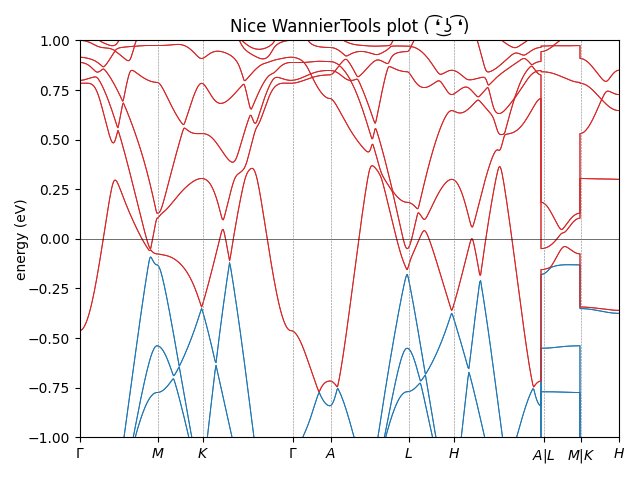

In [8]:
plot.bands(file='DATA/bands/WannierTools/bulkek.dat',               #raw data file with the band structure
                KPATH='DATA/bands/KPATH',                           #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo',#File needed to read the number of electrons and lattice parameters
                title='Nice WannierTools plot ( ͡❛ ͜ʖ ͡❛)',          # A title of your liking
                filetype='gnu',                                     #filetype (Quantum espresso being the default)
                fermi=0,                                            #manually overwritting the fermi energy
                num_elec=30)                                        #Manually overwriting the number of electrons (we are not wannierizing all the bands)

### Compare different codes

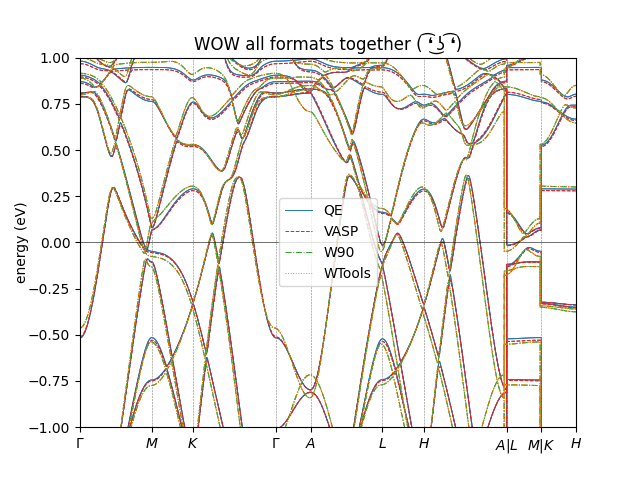

In [9]:
from yaiv import utils
files=['DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',
      'DATA/bands/VASP/EIGENVAL_BS',
      'DATA/bands/Wannier90/CsV3Sb5_band.dat',
      'DATA/bands/WannierTools/bulkek.dat']
KPATH='DATA/bands/KPATH'
filetypes=['qe','vasp','gnu','gnu']
fermi=[utils.grep_fermi('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo'),
      utils.grep_fermi('DATA/bands/VASP/OUTCAR_SCC',filetype='vasp'),
      utils.grep_fermi('DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo'),
      0]
legends=['QE','VASP','W90','WTools']
plot.bands_compare(files,KPATH,filetypes,fermi,legends,title='WOW all formats together ( ͡❛ ͜ʖ ͡❛)')

### Create your own figures

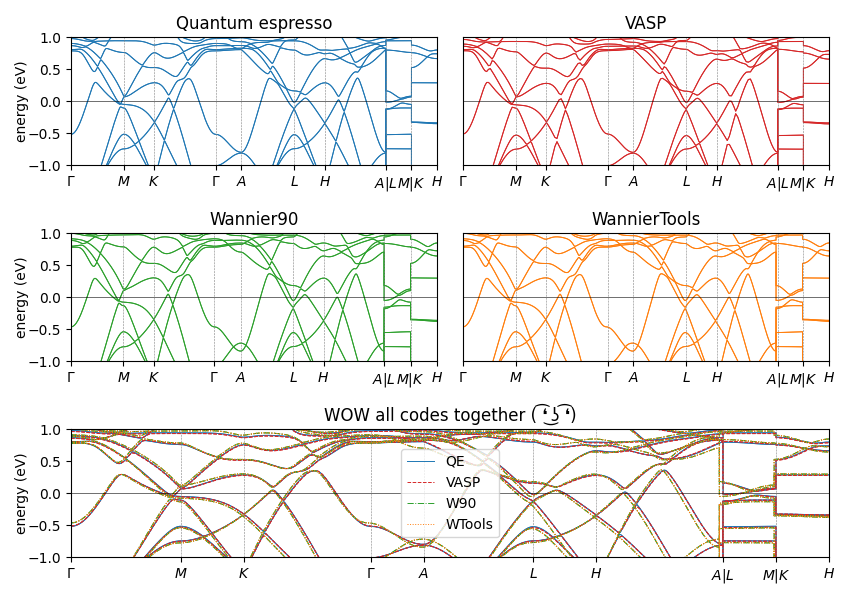

In [10]:
from yaiv import utils
import matplotlib.pyplot as plt

#NEEDED files
KPATH='DATA/bands/KPATH'              #File with the Kpath (in order to plot the ticks at the High symmetry points)
aux1='DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo' #Aux files needed to read the number of electrons and lattice parameters
aux2='DATA/bands/VASP/OUTCAR_SCC'
aux3='DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo'

files=['DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',   #raw data file with the band structure
      'DATA/bands/VASP/EIGENVAL_BS',
      'DATA/bands/Wannier90/CsV3Sb5_band.dat',
      'DATA/bands/WannierTools/bulkek.dat']
filetypes=['qe','vasp','gnu','gnu']                       #identifiers for the different data formats
fermi=[utils.grep_fermi(aux1),utils.grep_fermi(aux2,filetype='vasp'),utils.grep_fermi(aux3),0]  #Fermi energies
legends=['QE','VASP','W90','WTools']                      #Your desired legends


#Prepare your layout as usual
fig,axes=plt.subplots(3,2,figsize=(8.5,6))
[[ax1,ax2],[ax3,ax4],[ax5,ax6]]=axes
gs = axes[2, 1].get_gridspec()
ax5.remove()
ax6.remove()
ax5 = fig.add_subplot(gs[2, :])

#Plot the different subplots
plot.bands(files[0],KPATH,aux1,'Quantum espresso',axis=ax1,color='tab:blue')  #Subplot 1
plot.bands(files[1],KPATH,aux2,'VASP',filetype='vasp',axis=ax2,color='tab:red') #Subplot 2
ax2.set_ylabel('')              #Regular matplotlib sintax to remove axis
ax2.set_yticks([])
plot.bands(files[2],KPATH,aux3,'Wannier90',filetype='gnu',num_elec=30,axis=ax3,color='tab:green') #Subplot 3
plot.bands(files[3],KPATH,aux1,'WannierTools',filetype='gnu',num_elec=30,fermi=0,axis=ax4,color='tab:orange') #Subplot 4
ax4.set_ylabel('')              #Regular matplotlib sintax to remove axis
ax4.set_yticks([])
plot.bands_compare(files,KPATH,filetypes,fermi,legends,title='WOW all codes together ( ͡❛ ͜ʖ ͡❛)',axis=ax5) #Subplot 5

plt.tight_layout()
plt.show()

### Set your variables manually 

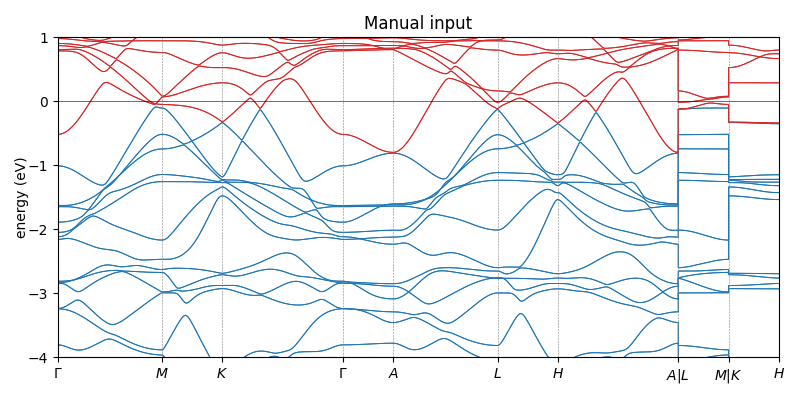

In [11]:
from yaiv import utils
import numpy as np

# INPUT PARAMETERS***********************************************************************
file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo'    #raw data file with the band structure
title='Manual input'                                    # A title of your liking
vectors=np.array([[ 1.      ,  0.      ,  0.      ],   #Lattice parameters needed to locate the ticks
                [-0.5     ,  0.866025,  0.      ],
                [ 0.      ,  0.      ,  1.794751]])
#Try: vectors = utils.grep_vectors(file)

ticks = np.array([[  0.     ,   0.     ,   0.     , 100.     ], #High symmetry points coordinates
       [  0.5    ,   0.     ,   0.     , 100.     ],
       [  0.33333,   0.33333,   0.     , 100.     ],
       [  0.     ,   0.     ,   0.     , 100.     ],
       [  0.     ,   0.     ,   0.5    , 100.     ],
       [  0.5    ,   0.     ,   0.5    , 100.     ],
       [  0.33333,   0.33333,   0.5    , 100.     ],
       [  0.     ,   0.     ,   0.5    ,   1.     ],
       [  0.5    ,   0.     ,   0.5    , 100.     ],
       [  0.5    ,   0.     ,   0.     ,   1.     ],
       [  0.33333,   0.33333,   0.     , 100.     ],
       [  0.33333,   0.33333,   0.5    ,   1.     ]])
#Try: ticks=utils.grep_ticks_QE('DATA/bands/QE/results_bands/CsV3Sb5.bands.pwi')
labels=['$\\Gamma$', '$M$', '$K$', '$\\Gamma$', '$A$', '$L$', '$H$', '$A|L$', '$M|K$', '$H$'] #Labels of the high symmetry points
#Try: ticks,labels=utils.grep_ticks_labels_KPATH('DATA/bands/KPATH')
fermi = 7.72                                            #Shift the energy according to the Fermi level
#Try: fermi = utils.grep_fermi('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo')
num_elec = 72                                           #Number of electrons to differ between valence and conduction bands
#Try: num_elec = utils.grep_electrons('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo')

# PLOT PARAMETERS***********************************************************************
plot.bands(file=file,
           title=title,
           vectors=vectors,
           ticks=ticks,
           labels = labels,
           fermi = fermi,
           window = [-4,1],            #Window of energies you want to see
           num_elec=72,
           figsize=(8,4)               #Any figure size           
          )